In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path=r'C:\Users\Shubhan\Downloads\banknifty.csv'

df=pd.read_csv(path)

print(df.head(5))

         Date           bnf   axis_bank  bandhan_bank     au_bank    sbi_bank  \
0  2019-01-02  27296.682170  619.527993    540.352142  306.003952  281.526196   
1  2019-01-03  27181.284539  617.936882    538.397872  308.591298  277.667094   
2  2019-01-04  26999.385085  608.589171    522.030959  308.989355  274.937482   
3  2019-01-07  27378.333126  622.511200    527.649463  310.979660  283.361597   
4  2019-01-08  27301.582495  632.455477    470.976020  304.561030  278.420056   

     bob_bank  idfc_bank  federal_bank   kotak_bank    hdfc_bank  icici_bank  \
0  113.257843  43.200001     88.455850  1243.470794  1019.898183  347.748267   
1  111.332007  42.650002     90.448956  1235.598863  1011.045048  351.115100   
2  110.414933  43.099998     88.503308  1233.605873  1006.785297  348.084956   
3  112.340782  46.000000     90.401506  1246.509951  1012.710985  353.520029   
4  112.707608  46.349998     90.021857  1238.588261  1009.998173  353.808639   

    pnb_bank  indusind_bank  
0 

In [2]:
df.shape

(1495, 14)

In [3]:
df.duplicated().sum()

0

In [4]:
df.describe()

,bnf,axis_bank,bandhan_bank,au_bank,sbi_bank,bob_bank,idfc_bank,federal_bank,kotak_bank,hdfc_bank,icici_bank,pnb_bank,indusind_bank
count,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000
mean,36962.229678,806.155368,305.262236,537.684226,461.512606,130.415237,54.144054,108.595831,1697.948906,1380.371564,724.995266,59.721231,1119.811752
std,8946.028276,214.640070,110.085657,151.537035,197.258217,70.639506,18.439268,42.738301,213.944849,232.754177,287.225816,30.160778,318.158122
min,16759.754383,292.226737,138.589996,189.287697,143.022073,33.151997,18.500000,35.581273,1091.751524,739.615583,274.531072,25.396061,281.985578
25%,30569.119850,687.006613,224.411323,395.847896,295.480139,76.391733,42.049999,81.259938,1604.196558,1190.373516,459.887852,35.301480,919.516524
50%,36370.129783,755.408583,280.027211,585.297469,454.068663,103.536932,50.500000,93.987908,1758.349976,1430.368121,703.267362,49.762214,1123.808150
75%,44040.474609,963.190108,338.980314,642.882324,578.302058,186.761457,66.000000,134.954574,1838.934826,1566.662002,924.981138,76.761023,1409.351800
max,54338.699219,1316.699951,610.949677,812.115794,897.000000,284.070025,99.750000,216.399994,2194.462367,1877.699951,1344.900024,139.452797,1744.497214


In [5]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)


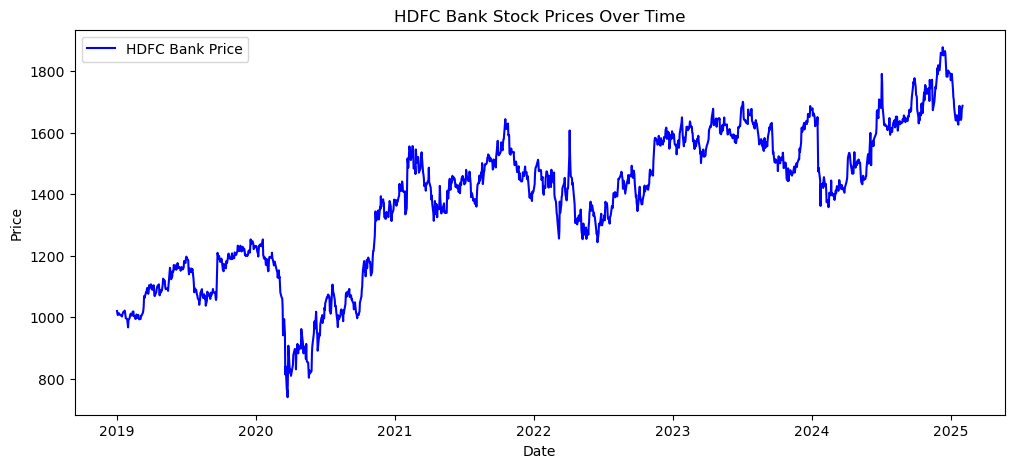

In [20]:
# Line Plot for a Single Bank (HDFC Bank)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df["hdfc_bank"], label="HDFC Bank Price", color="blue")
plt.title("HDFC Bank Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


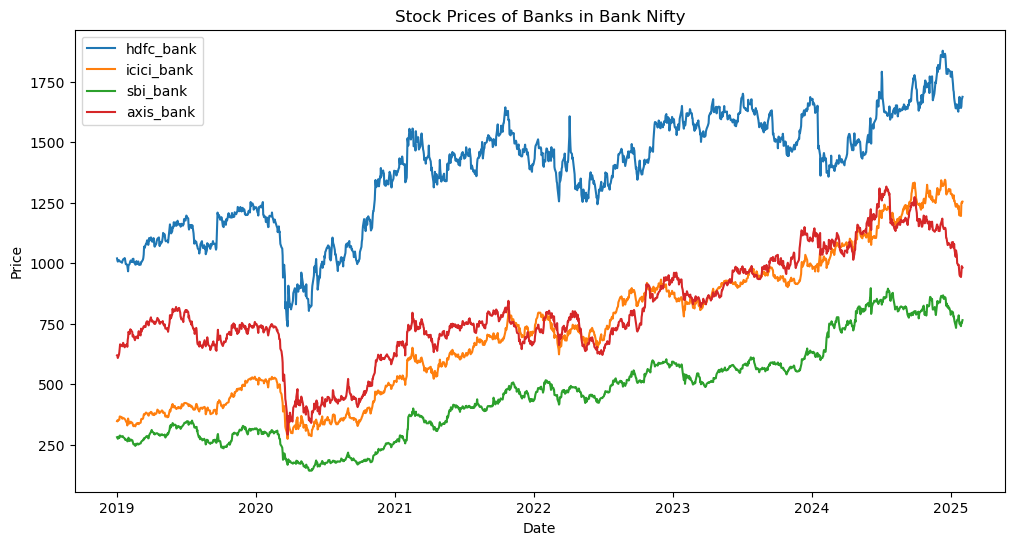

In [22]:
plt.figure(figsize=(12, 6))
for bank in ["hdfc_bank", "icici_bank", "sbi_bank", "axis_bank"]:
    plt.plot(df[bank], label=bank)
plt.title("Stock Prices of Banks in Bank Nifty")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


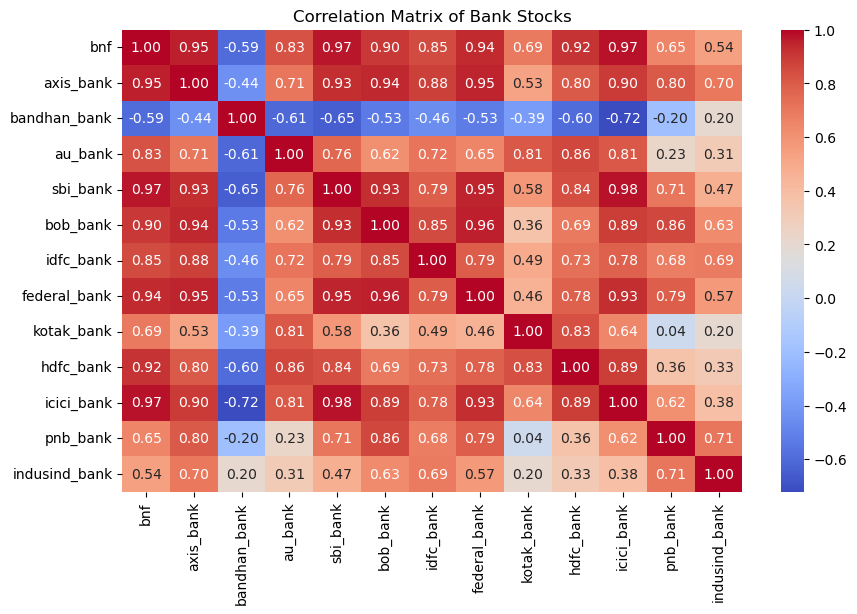

In [24]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Bank Stocks")
plt.show()


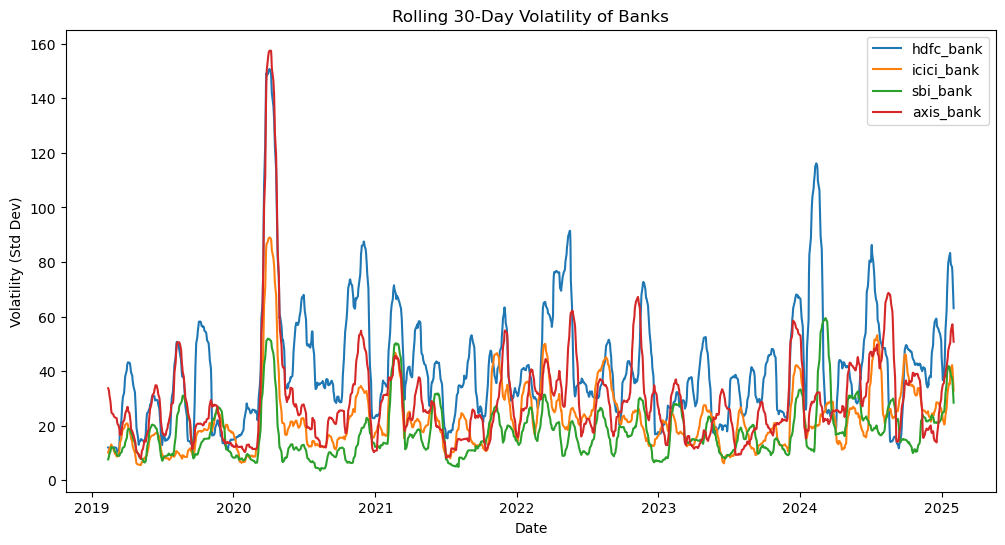

In [30]:
df_volatility = df.rolling(window=30).std()

plt.figure(figsize=(12, 6))
for bank in ["hdfc_bank", "icici_bank", "sbi_bank", "axis_bank"]:
    plt.plot(df_volatility[bank], label=bank)
plt.title("Rolling 30-Day Volatility of Banks")
plt.xlabel("Date")
plt.ylabel("Volatility (Std Dev)")
plt.legend()
plt.show()


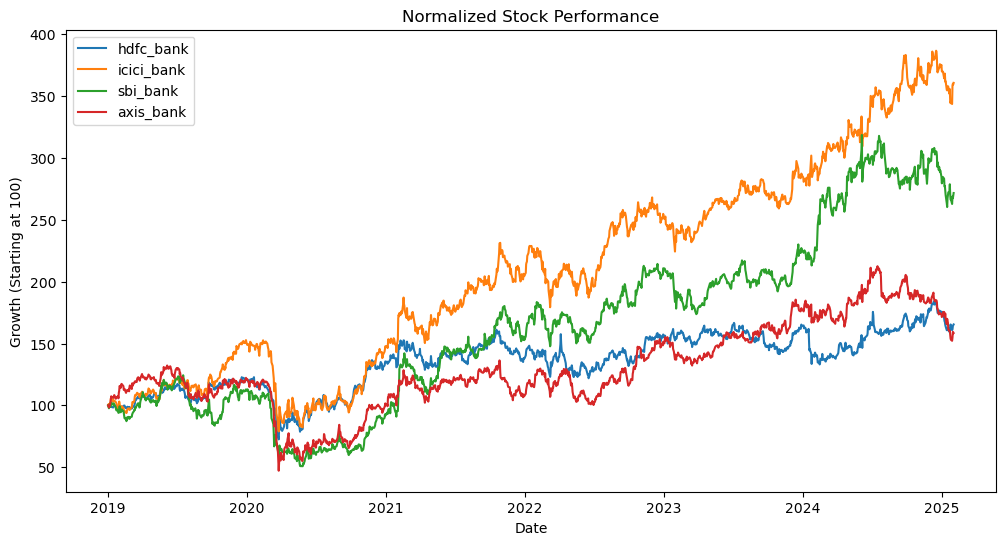

In [32]:
df_norm = df / df.iloc[0] * 100  # Scale starting price to 100

plt.figure(figsize=(12, 6))
for bank in ["hdfc_bank", "icici_bank", "sbi_bank", "axis_bank"]:
    plt.plot(df_norm[bank], label=bank)
plt.title("Normalized Stock Performance")
plt.xlabel("Date")
plt.ylabel("Growth (Starting at 100)")
plt.legend()
plt.show()


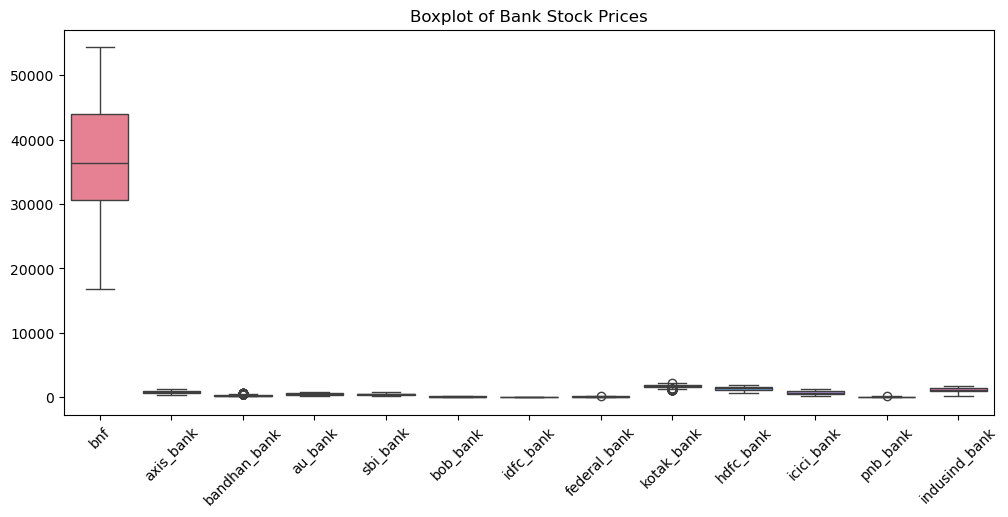

In [34]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df)
plt.title("Boxplot of Bank Stock Prices")
plt.xticks(rotation=45)
plt.show()


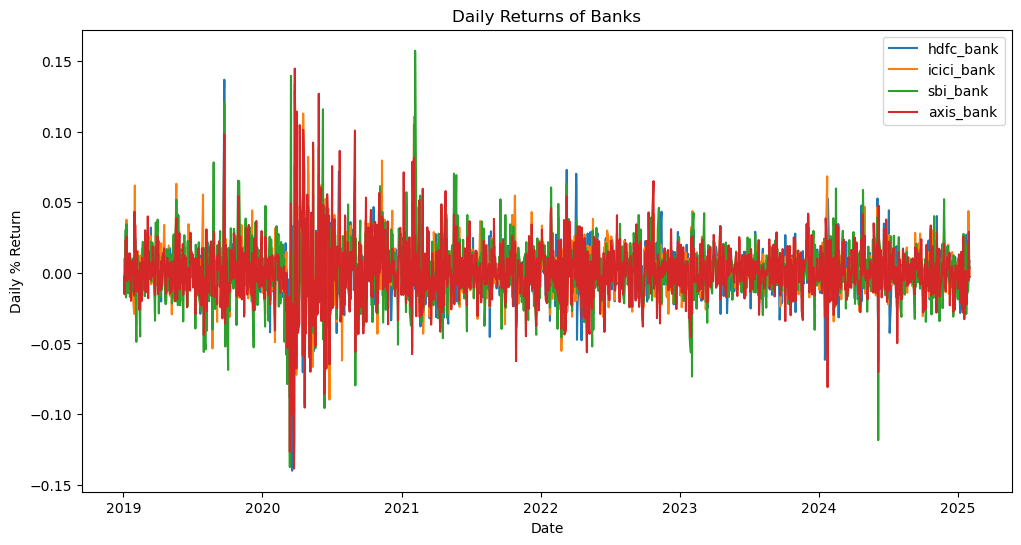

In [36]:
df_returns = df.pct_change()  # Percentage Change

plt.figure(figsize=(12, 6))
for bank in ["hdfc_bank", "icici_bank", "sbi_bank", "axis_bank"]:
    plt.plot(df_returns[bank], label=bank)
plt.title("Daily Returns of Banks")
plt.xlabel("Date")
plt.ylabel("Daily % Return")
plt.legend()
plt.show()


In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv(r"C:\Users\Shubhan\Downloads\banknifty.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Selecting a single bank (e.g., HDFC Bank) for prediction
df["Target"] = df["hdfc_bank"].shift(-1)  # Predict next day's price
df.dropna(inplace=True)

# Features (X) and Target (y)
X = df.drop("Target", axis=1)  # Use all bank prices to predict HDFC Bank
y = df["Target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}")


MAE: 18.914088737297664, MSE: 647.0279680704335


In [ ]:
df["Target"] = (df["hdfc_bank"].shift(-1) > df["hdfc_bank"]).astype(int)  # 1 if price increases, 0 otherwise
df.dropna(inplace=True)

X = df.drop("Target", axis=1)
y = df["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

from sklearn.ensemble import RandomForestClassifier

# Train Model
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate Model
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc}")


: 

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


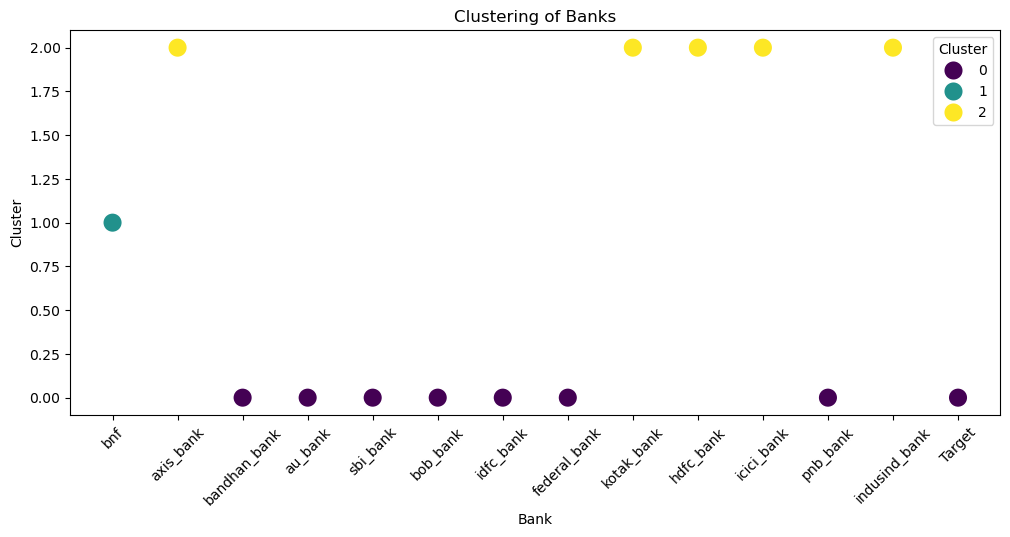

In [44]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Select last 60 days of stock prices
df_cluster = df.tail(60)

# Apply K-Means
kmeans = KMeans(n_clusters=3)  # Change clusters as needed
clusters = kmeans.fit_predict(df_cluster.T)

# Convert to DataFrame
bank_clusters = pd.DataFrame({"Bank": df_cluster.columns, "Cluster": clusters})

# Plot
plt.figure(figsize=(12, 5))
sns.scatterplot(x=bank_clusters["Bank"], y=bank_clusters["Cluster"], hue=bank_clusters["Cluster"], palette="viridis", s=200)
plt.xticks(rotation=45)
plt.title("Clustering of Banks")
plt.show()


In [62]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
df = pd.read_csv(r"C:\Users\Shubhan\Downloads\banknifty.csv", parse_dates=["Date"], index_col="Date")

# Ensure the index is a DateTimeIndex with a frequency
df = df.asfreq("B")  # "B" stands for Business Days

# Select a single bank (e.g., HDFC Bank)
bank_series = df["hdfc_bank"].dropna()  # Remove NaN values if any

# Train ARIMA Model
model = ARIMA(bank_series, order=(5,1,0))  # Order is (p,d,q)
model_fit = model.fit()

# Predict next 10 days
forecast_index = pd.date_range(start=bank_series.index[-1], periods=11, freq="B")[1:]  # Generate proper date index
forecast = pd.Series(model_fit.forecast(steps=10).values, index=forecast_index)

# Clean Output
print("\nPredicted Prices for Next 10 Days:\n")
print(forecast.to_string(index=True))


D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)



Predicted Prices for Next 10 Days:

2025-02-03    1687.023957
2025-02-04    1688.390613
2025-02-05    1688.755213
2025-02-06    1689.060384
2025-02-07    1689.027846
2025-02-10    1689.094150
2025-02-11    1689.117304
2025-02-12    1689.132232
2025-02-13    1689.129095
2025-02-14    1689.132304
Freq: B


D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [52]:
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df["HDFC_RSI"] = calculate_rsi(df["hdfc_bank"])
df.dropna(inplace=True)
